## NLP Mathematik Challenge Track Sprint 3

### Job-ads-Clustering with k-means

### Imports

In [68]:
import re
import string
import operator
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.linalg import svd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from stop_words import get_stop_words
from stop_words import safe_get_stop_words

### Subchallenge 1

In [69]:
# -*- coding: utf-8 -*-

dataset = pd.read_csv('jobs.csv', header = None, names = ['Job Desc'], encoding = 'ISO-8859-1')
dataset = dataset.dropna()
dataset.reset_index(inplace = True, drop = True)

 

def clean_mail(text_lines):

    #Remove punctuation

    text_lines = re.sub(r'([{}“”¨«»®´·º½¾¿¡§£₤‘’])'.format(string.punctuation), ' ',text_lines)
    text_lines = re.sub(r'[^a-z]?[0-9]+', '', text_lines) 
    text_lines = re.sub(r'([a-z]+[0-9]+)|([0-9]+[a-z]+)','', text_lines)
    stop_words = get_stop_words('en')
    stop_words = get_stop_words('english')
    # use german stop words
    stop_words = safe_get_stop_words('german')
   # print (stop_words)
    text_lines = ' '.join([word for word in text_lines.split(' ') if word and word not in stop_words])
    return text_lines

def non_it_job(text_lines):
    
    if re.search(r'(sql)|(linux)|(java)|(.net)|(python)|(windows)|(linux)|(network)|(eclipse)|(agile)',text_lines.lower()) or re.search(r'IT', text_lines):
        return 'Yes'
    else:
        return 'No'

dataset['Job Desc'] = dataset['Job Desc'].apply(clean_mail)
dataset['IT_or_Non_IT'] = dataset['Job Desc'].apply(non_it_job)

print('Non IT jobs ads are:\n')

for pos in range(len(dataset)):
    if dataset['IT_or_Non_IT'].iloc[pos] == 'No':
        print(dataset['Job Desc'].iloc[pos])



Non IT jobs ads are:

Dozent erziehungswissenschaftliche berufspraktische Ausbildung Sekundarstufe I 
beim Zentrum Lehrerinnen Lehrerbildung ZELF Universität Freiburg

 

Tätigkeitsgebiet

 Lehre erziehungswissenschaftlich didaktischen Bereich Seminare Allgemeine Didaktik Klassenführung Beurteilung eventuell Erweiterte Lehr Lernformen sowie Ethik Religionen Gemeinschaft 
 Betreuung Studierenden berufspraktischen Ausbildung
 Weiterbildung Praktikumslehrpersonen
 Mitarbeit Weiterentwicklung erziehungswissenschaftlichen berufspraktischen Ausbildungsangeboten Rahmen Bachelor Masterstudiengänge
Anforderungen

 Abgeschlossenes Studium erziehungswissenschaftlichen Disziplin vorzugsweise Promotion 
 Lehrdiplom Unterrichtserfahrung möglichst Sekundarstufe I
 Hochschuldidaktische Kompetenzen Teamfähigkeit Freude konzeptionellen praktischen Mitgestaltung attraktiven universitären Lehrerinnen Lehrerbildung Flexibilität
 Beherrschen deutschen Sprache guten Kenntnissen französischen Sprache
Ihre Auf

In [70]:
vector = CountVectorizer()
ad_Vectors = vector.fit_transform(dataset['Job Desc']).toarray() #Vector space of ads
print(ad_Vectors)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [71]:
dataset['Job Id'] = ''

for i in range(len(dataset)):
    dataset['Job Id'].iloc[i] = 'Job_{}'.format(i)

### Subchallenge 2

In [72]:
# create kmeans object
kmeans = KMeans(n_clusters=4) #Divide jobs data in 4 clusters
# fit kmeans object to data
kmeans.fit(ad_Vectors)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
job_cluster = kmeans.fit_predict(ad_Vectors)

dataset['Job Cluster'] = job_cluster

[[1.25000000e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.38777878e-17 1.53846154e-01 1.53846154e-01 ... 7.69230769e-02
  7.69230769e-02 7.69230769e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [73]:
def getVakanzen(anz_vak):

# Vakanzen:
# [Jobbezeichnung, Branche, Ausbildung, Stellenprozent, Ort, Geschlecht, Alter, Sprachen 1, ..., Sprachen M,Skill 1, ..., Skill N]
#
# Jobbezeichnung: 
#   1: Informatiker (Mediamatiker) (25%)
#   2: Entwickler (Softwareentwickler / Developer / Applikations-Engineer / Softwareingenieur) (50%)
#   3: Projektleiter (10%)
#   4: IT-Supporter  (5%)
#   5: Systemadministrator (5%)
#   6: Datenbank-Manager (5%)
#
# Branche:
#   1: Technik
#   2: Finanzen
#   3: Bau
#   4: Gesundheit
#   5: Versicherungen
#
# Ausbildung:
#   1: Berufslehre
#   2: Abschluss HF
#   3: Abschluss FH
#   4: Abschluss UNI / ETH
#   5: Doktorat
#  
# Stellenprozent: 0% => 0 / 100% => 1
#
# Ort: Kantone 1-26
#
# Geschlecht: m => 0 / w => 1
#
# Alter: 20 => 0 - 65 => 1
#
# Sprachen: keine Kentnisse => 0 / Muttersprache => 1
#   Sprache 1: de
#   Sprache 2: en
#   Sprache 3: fr
#   Sprache 4: it
#
# Skills: keine Kentnisse => 0 / Profi => 1
#   Skill 1: Java
#   Skill 2: SQL
#   Skill 3: .Net
#   Skill 4: Python
#   Skill 5: Windows
#   Skill 6: Linux
#   Skill 7: Netzwerke
#   Skill 8: Projektmanagement
#   Skill 9: Eclipse
#   Skill 10:Anforderungsanalyse
#   Skill 11: Agile Entwicklungsmethoden
 

    vakanzen = np.zeros((anz_vak,22))

    p=np.array([[0.9, 0.3, 0.9, 0.9, 0.8, 0.9, 0.3, 0.6, 0.7, 0.3, 0.4],

               [0.9, 0.9, 0.9, 0.9, 0.8, 0.9, 0.3, 0.6, 0.9, 0.7, 0.9 ],

               [0.6, 0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.9, 0.7, 0.9, 0.9],

               [0.1, 0.1, 0.1, 0.9, 0.4, 0.9, 0.1, 0.1, 0.1, 0.1, 0.1 ],

               [0.1, 0.1, 0.4, 0.9, 0.9, 0.9, 0.3, 0.1, 0.1, 0.3, 0.1],

               [0.2, 0.9, 0.8, 0.4, 0.4, 0.4, 0.1, 0.8, 0.7, 0.8, 0.5]])

 

    b=1000

 

    for k in range(anz_vak):

        job = np.random.choice([1,2,3,4,5,6], 1, replace=True,  p=[0.25, 0.5, 0.10, 0.05, 0.05, 0.05])

        branche = np.random.randint(5)+1

        ausbildung = np.random.randint(5)+1

        prozent = (np.random.randint(4)+1)/4

        ort = np.random.randint(26)+1

        geschlecht = np.random.choice([0,1])

        alter = np.random.randint(9)/9

        lang1 = np.random.randint(3)/2

        lang2 = np.random.randint(3)/2

        lang3 = np.random.randint(3)/2

        lang4 = np.random.randint(3)/2

   

        skill1 = np.random.beta(p[job-1,0]*b/(1-p[job-1,0]),b)

        skill2 = np.random.beta(p[job-1,1]*b/(1-p[job-1,1]),b)

        skill3 =np.random.beta(p[job-1,2]*b/(1-p[job-1,2]),b)

        skill4 = np.random.beta(p[job-1,3]*b/(1-p[job-1,3]),b)

        skill5 = np.random.beta(p[job-1,4]*b/(1-p[job-1,4]),b)

        skill6 = np.random.beta(p[job-1,5]*b/(1-p[job-1,5]),b)

        skill7 = np.random.beta(p[job-1,6]*b/(1-p[job-1,6]),b)

        skill8 = np.random.beta(p[job-1,7]*b/(1-p[job-1,7]),b)

        skill9 = np.random.beta(p[job-1,8]*b/(1-p[job-1,8]),b)

        skill10 = np.random.beta(p[job-1,9]*b/(1-p[job-1,9]),b)

        skill11 = np.random.beta(p[job-1,10]*b/(1-p[job-1,10]),b)

 

        vakanzen[k,:] = np.array([job,branche,ausbildung,prozent,ort,geschlecht,alter,lang1,lang2,lang3,lang4,skill1,skill2,skill3,

                             skill4,skill5,skill6,skill7, skill8,skill9,skill10,skill11])

    return vakanzen


In [74]:
vakanzen = getVakanzen(1000)

cols = ['job', 'branche', 'ausbildung', 'prozent', 'ort', 'geschlecht', 'alter', 'lang1', 'lang2', 'lang3', 'lang4', 'skill1', 'skill2', 'skill3', 'skill4', 'skill5', 'skill6', 'skill7', 'skill8', 'skill9', 'skill10', 'skill11']


job_dataset = pd.DataFrame(vakanzen, columns = cols)


cols_tb_dummy_encoded = ['job', 'branche', 'ausbildung', 'ort']


for col in cols_tb_dummy_encoded:
    job_dataset = pd.concat([job_dataset, pd.get_dummies(job_dataset[col], prefix = col)], axis=1)
    
cols_tb_used = [col for col in job_dataset.columns.tolist() if col not in cols_tb_dummy_encoded]

X = job_dataset[cols_tb_used].values



In [75]:

# create kmeans object
kmeans = KMeans(n_clusters=4) #Divide jobs data in 4 clusters
# fit kmeans object to data
kmeans.fit(X)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
job_cluster = kmeans.fit_predict(X)

#Lets take weights for skill features

X_weighted = X

for pos in range(1,12):
    weight = np.random.randint(10,20) #Take any random number between 10 and 20
    col_pos = cols_tb_used.index('skill{}'.format(pos))
    X_weighted[:,col_pos] = X_weighted[:,col_pos] * weight
    
    
# create kmeans object
kmeans_weighted = KMeans(n_clusters=4) #Divide jobs data in 4 clusters
# fit kmeans object to data
kmeans_weighted.fit(X_weighted)
# print location of clusters learned by kmeans object
print(kmeans_weighted.cluster_centers_)

[[ 6.24125874e-01  4.47552448e-01  4.25019425e-01  5.00000000e-01
   5.06993007e-01  4.72027972e-01  4.26573427e-01  4.67670540e-01
   6.98808899e-01  6.65369104e-01  5.33634317e-01  3.33103696e-01
   3.33424926e-01  2.31566898e-01  8.67062947e-01  6.99388786e-01
   8.67340460e-01  7.68767004e-01  5.55111512e-16 -6.66133815e-16
   6.71328671e-01  1.24900090e-16  1.04083409e-16  3.28671329e-01
   1.53846154e-01  2.44755245e-01  2.16783217e-01  2.02797203e-01
   1.81818182e-01  2.30769231e-01  1.60839161e-01  2.23776224e-01
   1.74825175e-01  2.09790210e-01  3.49650350e-02  4.89510490e-02
   3.49650350e-02  1.39860140e-02  3.49650350e-02  6.29370629e-02
   2.79720280e-02  4.19580420e-02  4.89510490e-02  3.49650350e-02
   4.19580420e-02  2.09790210e-02  4.89510490e-02  6.29370629e-02
   2.09790210e-02  1.39860140e-02  3.49650350e-02  1.39860140e-02
   6.99300699e-02  4.89510490e-02  3.49650350e-02  5.59440559e-02
   4.89510490e-02  2.79720280e-02  4.19580420e-02  2.79720280e-02]
 [ 6.0629

In [76]:
# save new clusters for chart
job_cluster_weighted = kmeans_weighted.fit_predict(X_weighted)

job_dataset = job_dataset[cols] 
job_dataset['Cluster'] = job_cluster
job_dataset['Cluster_Weighted'] = job_cluster_weighted

job_dataset.head(6)

,job,branche,ausbildung,prozent,ort,geschlecht,alter,lang1,lang2,lang3,...,skill4,skill5,skill6,skill7,skill8,skill9,skill10,skill11,Cluster,Cluster_Weighted
0,2.0,4.0,1.0,0.50,2.0,0.0,0.111111,1.0,0.5,0.0,...,0.898266,0.795744,0.899315,0.318385,0.605314,0.896407,0.695190,0.900543,1,1
1,1.0,4.0,4.0,1.00,16.0,1.0,0.222222,0.5,0.5,0.5,...,0.896773,0.798914,0.897890,0.322039,0.596690,0.693572,0.288142,0.414030,2,0
2,1.0,5.0,5.0,1.00,17.0,0.0,0.000000,0.5,1.0,0.5,...,0.899951,0.798430,0.901503,0.312502,0.595351,0.693494,0.287245,0.447275,2,0
3,1.0,4.0,5.0,0.50,3.0,1.0,0.888889,1.0,1.0,0.5,...,0.902708,0.805392,0.900385,0.300260,0.594997,0.689312,0.296125,0.416069,2,0
4,2.0,5.0,4.0,0.50,21.0,0.0,0.555556,0.5,0.5,0.5,...,0.898721,0.798197,0.902145,0.289865,0.605200,0.900503,0.701710,0.898569,1,1
5,1.0,1.0,2.0,0.25,18.0,1.0,0.111111,0.0,0.5,0.0,...,0.901488,0.790060,0.898477,0.304527,0.599018,0.696258,0.316712,0.410428,2,0


In [77]:
job_dataset.describe()

,job,branche,ausbildung,prozent,ort,geschlecht,alter,lang1,lang2,lang3,...,skill4,skill5,skill6,skill7,skill8,skill9,skill10,skill11,Cluster,Cluster_Weighted
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.320000,3.038000,2.963000,0.630500,13.544000,0.495000,0.446222,0.512000,0.506500,0.493500,...,0.847496,0.718534,0.818854,0.280857,0.585255,0.741682,0.580396,0.683182,1.410000,1.162000
std,1.292777,1.381472,1.430971,0.282267,7.438104,0.500225,0.279772,0.410517,0.397952,0.411555,...,0.133368,0.182942,0.199228,0.060533,0.191149,0.238469,0.231662,0.290817,0.859441,0.938422
min,1.000000,1.000000,1.000000,0.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.361611,0.262176,0.268116,0.081318,0.081655,0.080054,0.082207,0.081424,0.000000,0.000000
25%,2.000000,2.000000,2.000000,0.250000,7.000000,0.000000,0.222222,0.000000,0.000000,0.000000,...,0.896313,0.791589,0.896400,0.288405,0.590957,0.698216,0.304956,0.406150,1.000000,1.000000
50%,2.000000,3.000000,3.000000,0.750000,14.000000,0.000000,0.444444,0.500000,0.500000,0.500000,...,0.899360,0.798478,0.899116,0.298087,0.599573,0.894651,0.696091,0.897313,1.000000,1.000000
75%,2.000000,4.000000,4.000000,1.000000,20.000000,1.000000,0.666667,1.000000,1.000000,1.000000,...,0.901495,0.803250,0.901527,0.308082,0.609212,0.900044,0.707498,0.900772,2.000000,1.000000
max,6.000000,5.000000,5.000000,1.000000,26.000000,1.000000,0.888889,1.000000,1.000000,1.000000,...,0.907663,0.906294,0.910394,0.348159,0.907524,0.909239,0.907195,0.909074,3.000000,3.000000


In [78]:
X_embedded = TSNE(n_components=2).fit_transform(X)

plot_dataset = pd.DataFrame(X_embedded, columns = ['Var1','Var2'])
plot_dataset['Cluster'] = job_cluster
plot_dataset['Cluster_Weighted'] = job_cluster_weighted

### Plotting the Clusters

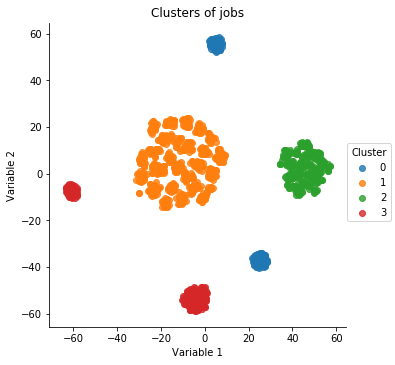

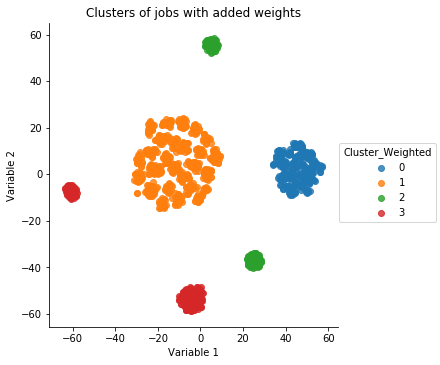

In [79]:

#Cluster plotting for jobs
sns.lmplot(x = 'Var1', y = 'Var2', data = plot_dataset, fit_reg = False, legend = True, hue = 'Cluster')
plt.title('Clusters of jobs')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.show()


#Cluster plotting for jobs with added weights
sns.lmplot(x = 'Var1', y = 'Var2', data = plot_dataset, fit_reg = False, legend = True, hue = 'Cluster_Weighted')
plt.title('Clusters of jobs with added weights')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.show()

### Subchallenge 3

In [83]:
#Finding the best job fit for all the random job profiles

best_job_ads = []

for job_prof in range(len(job_dataset)):
    job_prf_vect = X[job_prof,:]
    dist = []
    for job_ad in range(len(dataset)):
        job_ad_vect = ad_Vectors[job_ad,:]
        job_prf_vect = np.pad(job_prf_vect, (0,len(job_ad_vect) - len(job_prf_vect)), 'constant') #Make all the dimensions same
        dist.append(np.linalg.norm(job_ad_vect - job_prf_vect))
        
    best_job_ads.append(dataset['Job Id'].iloc[dist.index(max(dist))])
    

job_dataset['Best Add Match'] = best_job_ads



#Finding the best job fit for all the random job profiles for weighted values    
    
best_job_ads = []

for job_prof in range(len(job_dataset)):
    job_prf_vect = X_weighted[job_prof,:]
    dist = []
    for job_ad in range(len(dataset)):
        job_ad_vect = ad_Vectors[job_ad,:]
        job_prf_vect = np.pad(job_prf_vect, (0,len(job_ad_vect) - len(job_prf_vect)), 'constant') #Make all the dimensions same
        dist.append(np.linalg.norm(job_ad_vect - job_prf_vect))
        
    best_job_ads.append(dataset['Job Id'].iloc[dist.index(max(dist))])
    
job_dataset['Best Add Match Wighted'] = best_job_ads

In [84]:
# Take a job vector
'''job_vector = [6.0, 2.0, 2.0, 0.6, 22.0, 1, 0.45454587, 1, 1, 0, 0 ,1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]

job_dataset.drop(['Cluster','Cluster_Weighted'], axis = 1, inplace = True)


# Transform job vectors in dummy variable vectors
job_dataset = job_dataset.append(pd.Series(job_vector, index=job_dataset.columns),ignore_index=True)

cols_tb_dummy_encoded = ['job', 'branche', 'ausbildung', 'ort']


for col in cols_tb_dummy_encoded:
    job_dataset = pd.concat([job_dataset, pd.get_dummies(job_dataset[col], prefix = col)], axis=1)
    
cols_tb_used = [col for col in job_dataset.columns.tolist() if col not in cols_tb_dummy_encoded]

job_vector = job_dataset[cols_tb_used].iloc[-1].values

clustser_val = kmeans.predict(job_vector.reshape(1,-1))
print('Cluster Value to which this vector belongs is :', clustser_val[0])'''

job_vector = [6.0, 2.0, 2.0, 0.6, 22.0, 1, 0.45454587, 1, 1, 0, 0 ,1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]

#Let's find the top 10 perfect job match for the given vector
dist_val = {}

for pos in range(len(ad_Vectors)):
    job_ad_vect = ad_Vectors[pos,:]
    job_vector = np.pad(job_vector, (0,len(job_ad_vect) - len(job_vector)), 'constant') 
    dist_val[pos] = np.linalg.norm(job_ad_vect - job_vector)

sorted_dict = sorted(dist_val.items(), key=operator.itemgetter(1))[:10]

print('Top 10 job classes to which the given job vector belongs are:')
for vals in sorted_dict:
    print('Job {} with distance {}'.format(vals[0], vals[1]))


Top 10 job classes to which the given job vector belongs are:
Job 6 with distance 24.36322252798127
Job 2 with distance 24.99133073583586
Job 15 with distance 25.130989076197025
Job 3 with distance 25.368614702973716
Job 13 with distance 25.388316445718374
Job 8 with distance 25.759786721708977
Job 17 with distance 26.259600376775236
Job 4 with distance 26.335652867319126
Job 22 with distance 26.96973511082254
Job 1 with distance 27.37821418478448


In [53]:
'''# Now let's see to which cluster it belongs in the wighted k means
kmeans_weighted = kmeans.predict(job_vector.reshape(1,-1))
print('Cluster Value to which this vector belongs is :', clustser_val[0])'''


Cluster Value to which this vector belongs is : 0


In [85]:
'''job_dataset = job_dataset[:1000]

job_id = []

for pos in range(len(job_dataset)):
    job_id.append('Job {}'.format(pos))
    
job_dataset['Job Id'] = job_id

# Let's find the top 10 perfect job match for the given vector
dist_val = {}

for pos in range(len(job_dataset)):
    dist_val[pos] = np.linalg.norm(X[pos, :] - job_vector)

sorted_dict = sorted(dist_val.items(), key=operator.itemgetter(1))[:10]


print('Top 10 job classes to which the given job vector belongs are:')
for vals in sorted_dict:
    print('Job {} with distance {}'.format(vals[0], vals[1]))'''

"job_dataset = job_dataset[:1000]\n\njob_id = []\n\nfor pos in range(len(job_dataset)):\n    job_id.append('Job {}'.format(pos))\n    \njob_dataset['Job Id'] = job_id\n\n# Let's find the top 10 perfect job match for the given vector\ndist_val = {}\n\nfor pos in range(len(job_dataset)):\n    dist_val[pos] = np.linalg.norm(X[pos, :] - job_vector)\n\nsorted_dict = sorted(dist_val.items(), key=operator.itemgetter(1))[:10]\n\n\nprint('Top 10 job classes to which the given job vector belongs are:')\nfor vals in sorted_dict:\n    print('Job {} with distance {}'.format(vals[0], vals[1]))"

### Subchallenge 4

In [86]:

def calc_dist(x_vect, job_vect):
    x_vect = np.pad(x_vect, (0,len(job_vect) - len(x_vect)), 'constant') #Make all the dimensions same
    dist = np.linalg.norm(job_vect - x_vect)
    return dist


# Singular-value decomposition with 4 (n) largest singular values

U, s, VT = svd(X)

# create m x n Sigma matrix
Sigma = np.zeros((X.shape[0], X.shape[1]))

# populate Sigma with n x n diagonal matrix
Sigma[:X.shape[1], :X.shape[1]] = np.diag(s)

# select
n_elements = 4
Sigma = Sigma[:, :n_elements]
VT = VT[:n_elements, :]

# reconstruct
B = U.dot(Sigma.dot(VT))

# transform
T = U.dot(Sigma)
X_svd = X.dot(VT.T) #Reduced matrix with 4 largest singular value

print('SVD reduced matrix')
print(X_svd)



SVD reduced matrix
[[-4.10333135e+01  1.59757652e+00  3.12104370e-02  1.65489019e+00]
 [-3.41352058e+01 -7.62521909e+00 -3.93490929e+00 -2.21287072e+00]
 [-3.42559939e+01 -7.40948064e+00 -3.79778695e+00 -1.88707065e+00]
 ...
 [-3.42740279e+01 -7.59192610e+00 -3.82117677e+00 -2.25550047e+00]
 [-1.35089899e+01 -1.04014050e+01  9.18251250e+00  1.11900919e+00]
 [-3.42204603e+01 -7.48023565e+00 -3.79180484e+00 -2.00154733e+00]]


### Find the top 10 jobs on the given vector from subchallenge 3 

In [87]:
dist_val = {}

for pos in range(len(X_svd)):
    dist_val[pos] = calc_dist(X_svd[pos, :], job_vector)
    
sorted_dict = sorted(dist_val.items(), key=operator.itemgetter(1))[:10]

print('Top 10 job classes after applying SVD to which the given job vector belongs are:')
for vals in sorted_dict:
    print('Job {} with distance {}'.format(vals[0], vals[1]))

Top 10 job classes after applying SVD to which the given job vector belongs are:
Job 50 with distance 32.66469158456928
Job 184 with distance 32.66933520037821
Job 452 with distance 32.677034720586484
Job 290 with distance 32.684844700447215
Job 483 with distance 32.68610302751332
Job 555 with distance 32.72133973129638
Job 236 with distance 32.726632367285596
Job 311 with distance 32.73128455115699
Job 515 with distance 32.731496541115824
Job 993 with distance 32.75347708378083
